In [1]:
import format
import buildmodel
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


from sklearn import linear_model
from sklearn.svm import SVR
import extract_features

In [2]:
linear = buildmodel.BuildModel("linear_regression", "split")
dataset = linear.load("dataset_b")

In [3]:
# variables = format.extract(dataset, independant=('x','y','xy'), dependant=('l','r'))
# X = variables['independant']['x']
# Y = variables['independant']['y']
# yLeft, yRight = (variables['dependant']['l'],variables['dependant']['r'])

In [43]:
extract = extract_features.ExtractFeatures(3)
X,y = extract.from_data(dataset)
yLeft = [[sample[0]] for sample in y]
yRight = [[sample[1]] for sample in y]

In [44]:
l = linear_model.LinearRegression()
model = l.fit(X[:100000],y[:100000])

In [51]:
model.score(X[100000:],y[100000:])

SyntaxError: invalid syntax (<ipython-input-51-ce93e69e7cc9>, line 1)

In [52]:
np.asarray(yRight).reshape(1,-1)

array([[ -0.,  -0.,  -0., ..., 100., 100., 100.]])

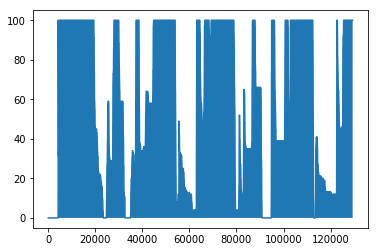

In [53]:
plt.figure()
# plt.plot(np.linspace(0,len(yLeft),len(yLeft)),yLeft)
xs = np.linspace(0,len(yRight),len(yRight))
plt.plot(xs,yRight)
plt.gca().fill_between(xs, np.asarray(yRight).reshape(1,-1)[0], 0)


In [ ]:
X = np.linspace(0,10,60).reshape(-1,1)
y = np.asarray([100-el*el for el in X]).reshape(-1,1)

# variables = format.extract(dataset, independant=('x','y','xy'), dependant=('l','r'),dependant_match_num_blocks=True)
# X = variables['independant']['x']
# y = variables['dependant']['l']

plt.figure()
plt.scatter(X,y)

svr = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1)
model = svr.fit(X,y)
plt.plot(X,model.predict(X).reshape(-1,1),c='r')